In [ ]:
# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# Lesson: pyMetaheuristic - Multiverse Optimizer
 
# GitHub Repository: <https://github.com/Valdecy>

In [ ]:
# Build Dir
import os
os.chdir('/content')
CODE_DIR = 'code'

# Clone Github Repository
!git clone https://github.com/Valdecy/pyMetaheuristic.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

Cloning into 'code'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 65 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
# Required Libraries
import math
import matplotlib.pyplot as plt
import numpy as np

# MVO
from pyMetaheuristic.multiverse_optimizer.mvo import  muti_verse_optimizer

In [ ]:
# Target Function - It can be any function that needs to be minimize, However it has to have only one argument: 'variables_values'. This Argument must be a list of variables.
# For Instance, suppose that our Target Function is the Easom Function (With two variables x1 and x2. Global Minimum f(x1, x2) = -1 for, x1 = 3.14 and x2 = 3.14)

# Target Function: Easom Function
def easom(variables_values = [0, 0]):
    return -math.cos(variables_values[0])*math.cos(variables_values[1])*math.exp(-(variables_values[0] - math.pi)**2 - (variables_values[1] - math.pi)**2)

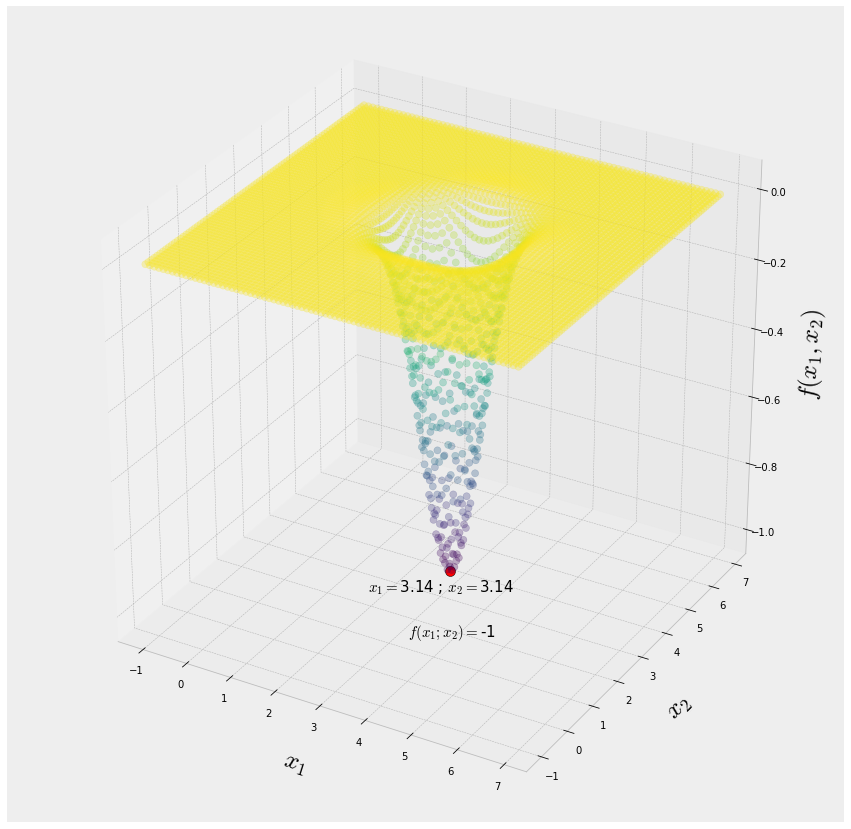

In [ ]:
# Target Function - Values
x     = np.arange(-1, 7, 0.1)
front = np.zeros((len(x)**2, 3))
count = 0
for j in range (0, len(x)):
    for k in range (0, len(x)):
            front[count, 0] = x[j]
            front[count, 1] = x[k]
            count           = count + 1        
for i in range (0, front.shape[0]):
    front[i, 2] = easom(variables_values = [front[i, 0], front[i, 1]])
front_1       = front[:, 0]
front_2       = front[:, 1]
func_1_values = front[:,-1]

# Target Function - Plot 
plt.style.use('bmh')
fig = plt.figure(figsize = (15, 15))
ax  = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('$x_1$', fontsize = 25, labelpad = 20)
ax.set_ylabel('$x_2$', fontsize = 25, labelpad = 20)
ax.set_zlabel('$f(x_1, x_2)$', fontsize = 25, labelpad = 20)
ax.scatter(front_1, front_2, func_1_values, c = func_1_values, s = 50, alpha = 0.3)
ax.scatter(math.pi, math.pi, -1, c = 'red', s = 100, alpha = 1, edgecolors = 'k', marker = 'o')
ax.text(math.pi-1.0, math.pi-1.5, -1,  '$x_1 = $' + str(round(math.pi, 2)) + ' ; $x_2 = $' + str(round(math.pi, 2)), size = 15, zorder = 1, color = 'k')
ax.text(math.pi+0.5, math.pi-2.5, -1,  '$f(x_1;x_2) = $' + str(-1), size = 15, zorder = 1, color = 'k')
plt.show()

In [ ]:
# MVO - Parameters
ss   = 50
minv = [-5, -5]
maxv = [ 5,  5]
iter = 100
tgt  = easom

In [ ]:
# MVO - Algorithm
mvo = muti_verse_optimizer(universes = ss, min_values = minv, max_values = maxv, iterations = iter, target_function = tgt)

Iteration =  0  f(x) =  -0.64958565570723
Iteration =  1  f(x) =  -0.6777089367661868
Iteration =  2  f(x) =  -0.6777089367661868
Iteration =  3  f(x) =  -0.7023095933568044
Iteration =  4  f(x) =  -0.8099423316529744
Iteration =  5  f(x) =  -0.8099423316529744
Iteration =  6  f(x) =  -0.8099423316529744
Iteration =  7  f(x) =  -0.9272981211017308
Iteration =  8  f(x) =  -0.9825858676121954
Iteration =  9  f(x) =  -0.9825858676121954
Iteration =  10  f(x) =  -0.9825858676121954
Iteration =  11  f(x) =  -0.9961396368315741
Iteration =  12  f(x) =  -0.9961396368315741
Iteration =  13  f(x) =  -0.9961396368315741
Iteration =  14  f(x) =  -0.9961396368315741
Iteration =  15  f(x) =  -0.9991341594716008
Iteration =  16  f(x) =  -0.9991341594716008
Iteration =  17  f(x) =  -0.9991341594716008
Iteration =  18  f(x) =  -0.9991341594716008
Iteration =  19  f(x) =  -0.9991341594716008
Iteration =  20  f(x) =  -0.9991341594716008
Iteration =  21  f(x) =  -0.9991341594716008
Iteration =  22  f(x) 

In [ ]:
# MVO - Solution
variables = mvo[:-1]
minimum   = mvo[ -1]
print('Variables: ', np.around(variables, 4) , ' Minimum Value Found: ', round(minimum, 4) )

Variables:  [3.1403 3.1412]  Minimum Value Found:  -1.0


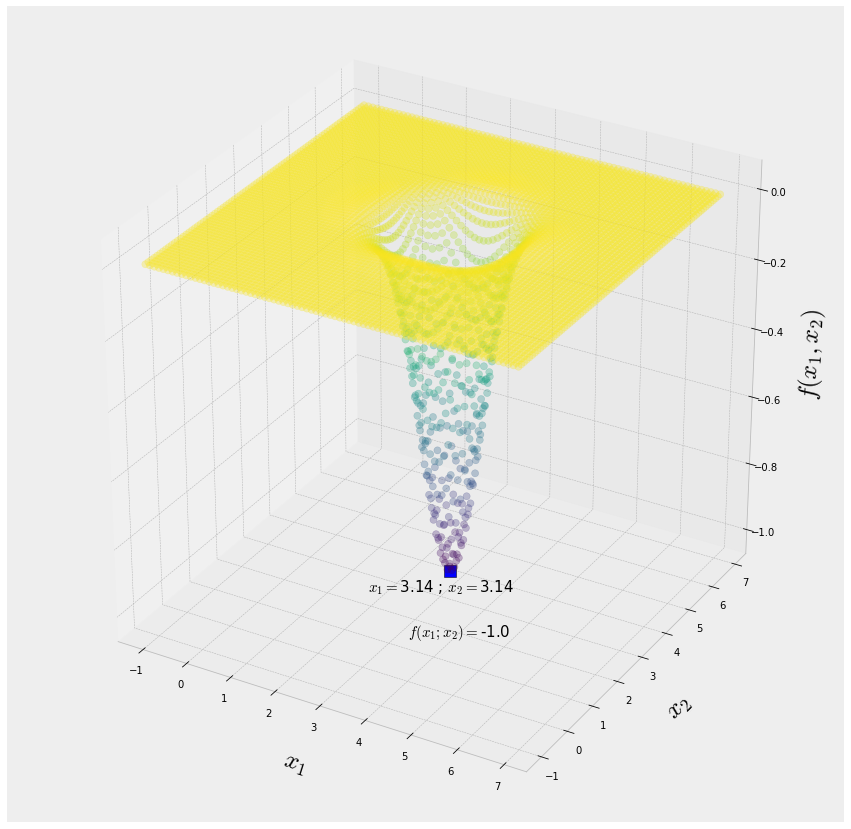

In [ ]:
# MVO - Plot Solution
plt.style.use('bmh')
fig = plt.figure(figsize = (15, 15))
ax  = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('$x_1$', fontsize = 25, labelpad = 20)
ax.set_ylabel('$x_2$', fontsize = 25, labelpad = 20)
ax.set_zlabel('$f(x_1, x_2)$', fontsize = 25, labelpad = 20)
ax.scatter(front_1, front_2, func_1_values, c = func_1_values, s = 50, alpha = 0.3)
ax.scatter(variables[0], variables[1], minimum, c = 'b', s = 150, alpha = 1, edgecolors = 'k', marker = 's')
ax.text(math.pi-1.0, math.pi-1.5, -1,  '$x_1 = $' + str(round(variables[0], 2)) + ' ; $x_2 = $' + str(round(variables[1], 2)), size = 15, zorder = 1, color = 'k')
ax.text(math.pi+0.5, math.pi-2.5, -1,  '$f(x_1;x_2) = $' + str(round(minimum, 4)), size = 15, zorder = 1, color = 'k')
plt.show()